In [1]:
import os
import soundfile
import librosa

import numpy as np

In [2]:
audio_path = r"GTZAN Dataset\blues\blues.00001.wav"
x , sr = librosa.load(audio_path)

print(type(x), type(sr))

print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


In [33]:
import winsound

winsound.PlaySound(audio_path, winsound.SND_FILENAME)

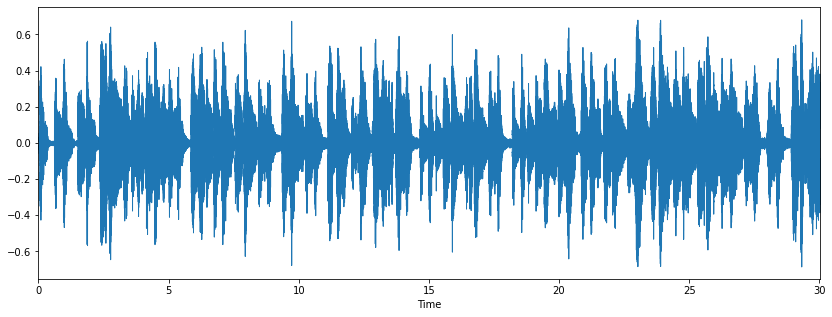

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

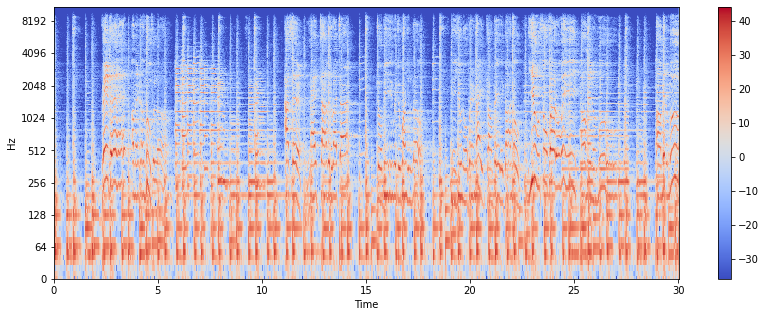

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

2


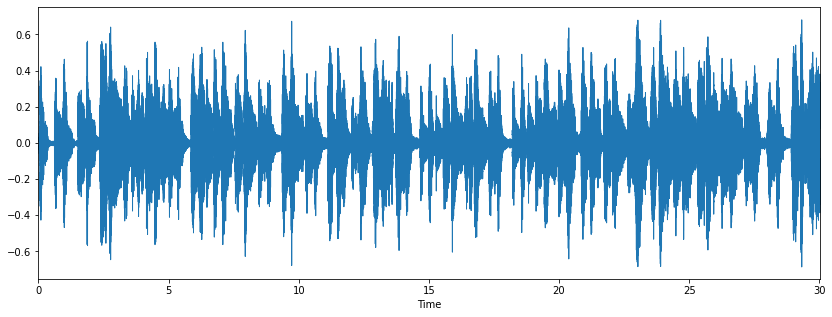

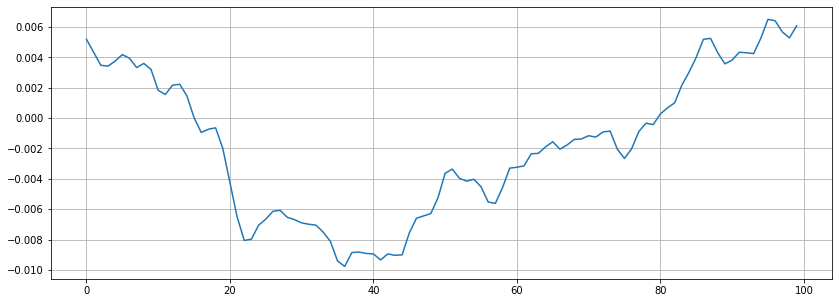

In [8]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

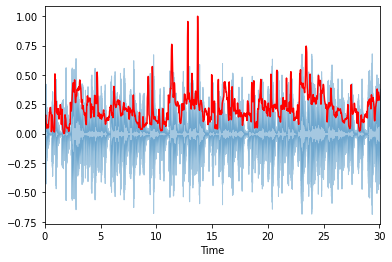

In [19]:
import sklearn.preprocessing

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

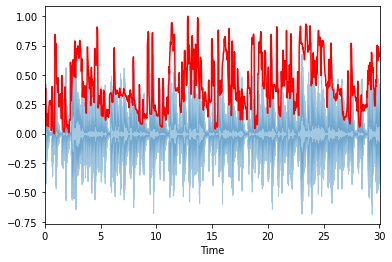

In [18]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 1293)


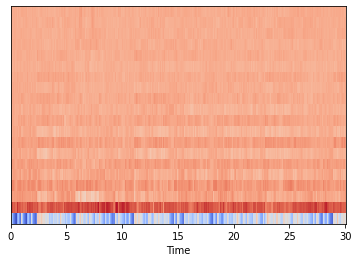

In [27]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 5.9005369e-09 -5.9005369e-09  0.0000000e+00 -5.9005369e-09
  0.0000000e+00  0.0000000e+00 -8.8508054e-09  0.0000000e+00
  0.0000000e+00  5.9005369e-09  0.0000000e+00  0.0000000e+00
 -5.9005369e-09 -8.8508054e-09  0.0000000e+00 -4.4254027e-09
  1.1801074e-08  1.1801074e-08  0.0000000e+00  5.9005369e-09]
[1.0000001 1.        1.        1.0000001 1.0000001 1.        1.
 0.9999998 1.        0.9999998 1.        1.        0.9999999 1.0000002
 1.0000001 1.        1.        1.        0.9999999 1.       ]


E:\Python\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
E:\Python\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


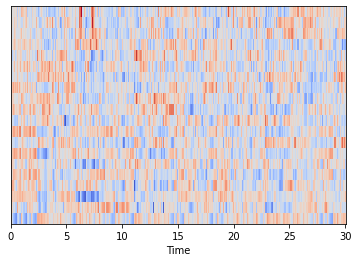

In [29]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

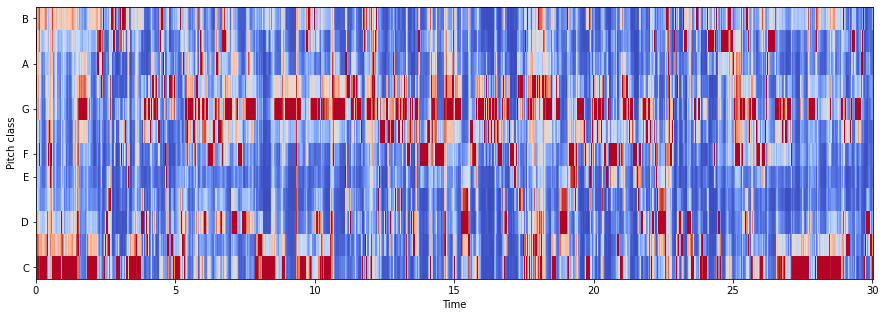

In [30]:
# Chroma Frequencies

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')